# Gentle Grid ii

I liked the output from last one, I want to see what happens if I phase multiple gradients together

In [1]:
import shades
import random

Let's just start with just two

In [2]:
class DualGrid(shades.Shade):
    def __init__(self):
        super().__init__()
        self.x_shift = random.random()
        self.y_shift = random.random()
        self.gradient_one = shades.NoiseGradient(
            color=(200, 200, 200),
            color_fields=shades.noise_fields(channels=3),
        )
        self.gradient_two = shades.NoiseGradient(
            color=(200, 200, 200),
            color_fields=shades.noise_fields(channels=3),
        )
        
    def determine_shade(self, xy_coords):
        xy = (xy_coords[0] + (self.x_shift * xy_coords[1]), xy_coords[1] + (self.y_shift * xy_coords[0]))
        new_x = ((xy[0] // 50) * 50)
        new_y = ((xy[1] // 50) * 50)
        if (new_x / 50) % 2 == 0 and (new_y / 50) % 2 == 0:
            return self.gradient_one.determine_shade((new_x, new_y))
        if (new_x / 50) % 2 != 0 and (new_y / 50) % 2 != 0:
            return self.gradient_one.determine_shade((new_x, new_y))
        return self.gradient_two.determine_shade((new_x, new_y))

In [3]:
def dual_grid():
    canvas = shades.Canvas()
    x = DualGrid()
    x.fill(canvas)
    return canvas

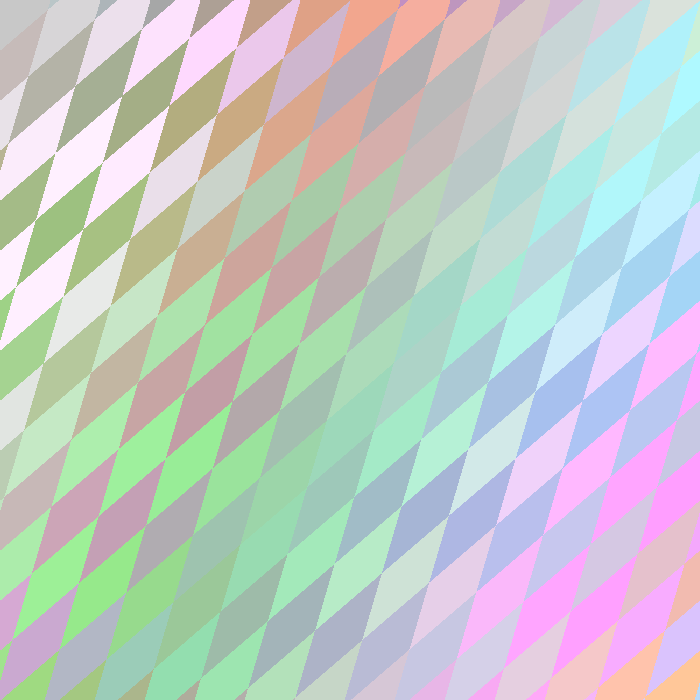

In [4]:
dual_grid()

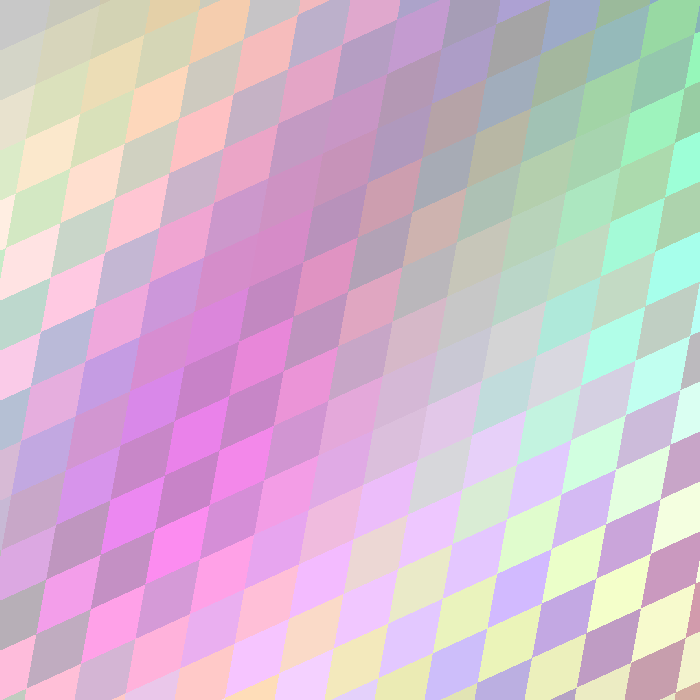

In [5]:
dual_grid()

That's pretty psychedelic - can we do the same thing but with n shades?

We'll need to make the tones follow the same noise field, otherwise the gradient won't be visible.

I guess it should have been obvious that the gradient wouldn't be visible anymore. What if they're all the same gradient but with different hues?

In [6]:
class PhasedGrid(shades.Shade):
    def __init__(self):
        super().__init__()
        self.grid_size = random.randint(10, 40)
        self.x_shift = random.random()
        self.y_shift = random.random()
        self.n = random.randint(3, 8)
        fields = shades.noise_fields(channels=3)
        self.shades = [
            shades.NoiseGradient(
                color=(random.randint(180, 220), random.randint(180, 220), random.randint(180, 220)),
                color_fields=fields,
                color_variance=random.randint(65, 75)
            )
            for i in range(self.n)
        ]
        
    def determine_shade(self, xy_coords):
        xy = (xy_coords[0] + (self.x_shift * xy_coords[1]), xy_coords[1] + (self.y_shift * xy_coords[0]))
        new_x = ((xy[0] // self.grid_size) * self.grid_size)
        new_y = ((xy[1] // self.grid_size) * self.grid_size)
        return self.shades[
            int(((new_x / self.grid_size) + (new_y / self.grid_size)) % self.n)
        ].determine_shade((new_x, new_y))

In [7]:
def phased_grid():
    canvas = shades.Canvas()
    x = PhasedGrid()
    x.fill(canvas)
    return canvas

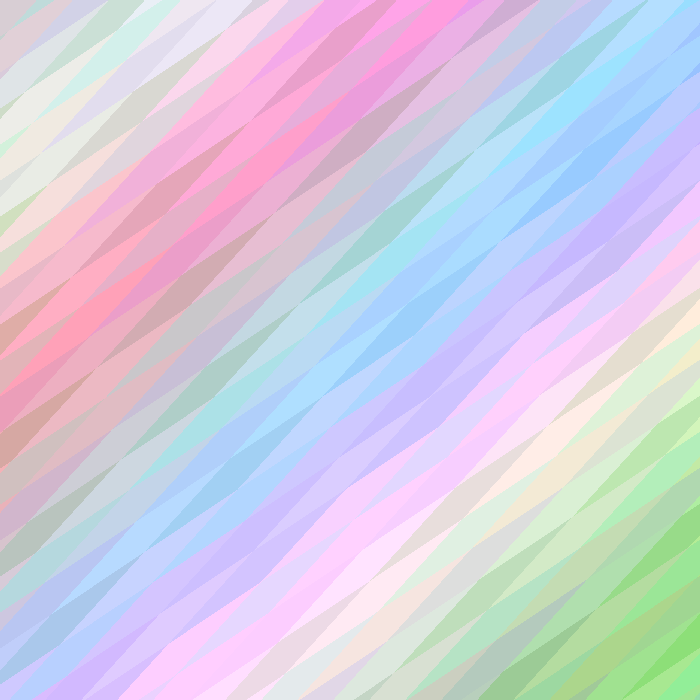

In [8]:
phased_grid()

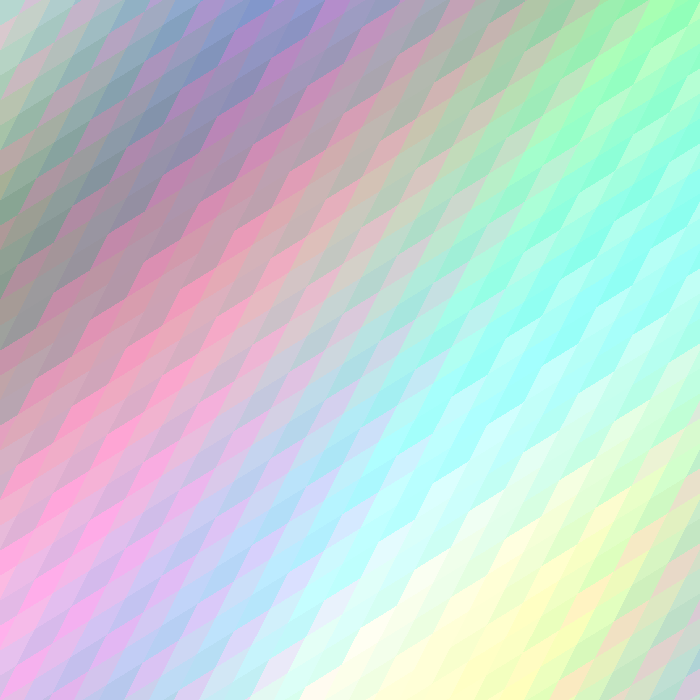

In [9]:
phased_grid()

Niiice, what if we take it to 11?

In [10]:
class SuperPhaseGrid(shades.Shade):
    def __init__(self):
        super().__init__()
        self.grid_size = random.randint(4, 15)
        self.x_shift = random.random()
        self.y_shift = random.random()
        self.n = random.randint(20, 100)
        fields = shades.noise_fields(channels=3)
        self.shades = [
            shades.NoiseGradient(
                color=(random.randint(190, 210), random.randint(190, 210), random.randint(190, 210)),
                color_fields=fields,
                color_variance=random.randint(65, 75)
            )
            for i in range(self.n)
        ]
        
    def determine_shade(self, xy_coords):
        xy = (xy_coords[0] + (self.x_shift * xy_coords[1]), xy_coords[1] + (self.y_shift * xy_coords[0]))
        new_x = ((xy[0] // self.grid_size) * self.grid_size)
        new_y = ((xy[1] // self.grid_size) * self.grid_size)
        return self.shades[
            int(((new_x / self.grid_size) + (new_y / self.grid_size)) % self.n)
        ].determine_shade((new_x, new_y))

In [11]:
def super_phase_grid():
    canvas = shades.Canvas()
    x = SuperPhaseGrid()
    x.fill(canvas)
    return canvas

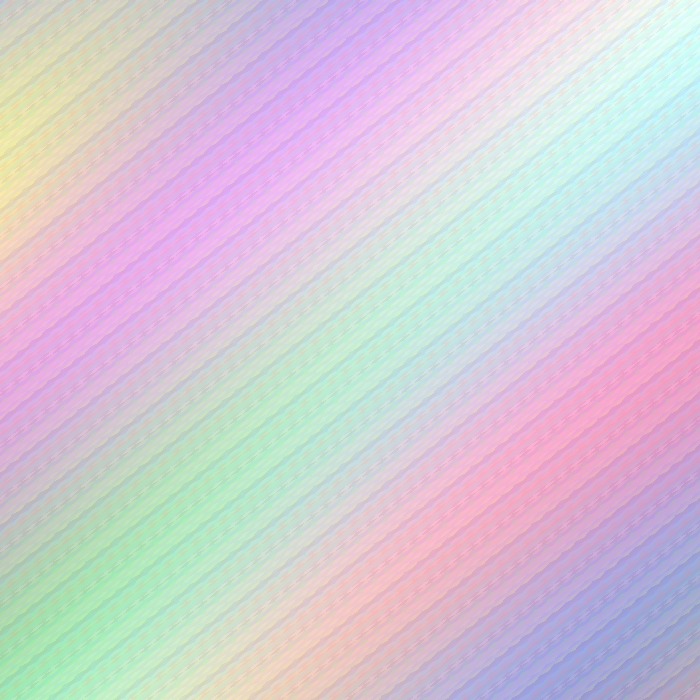

In [12]:
super_phase_grid()

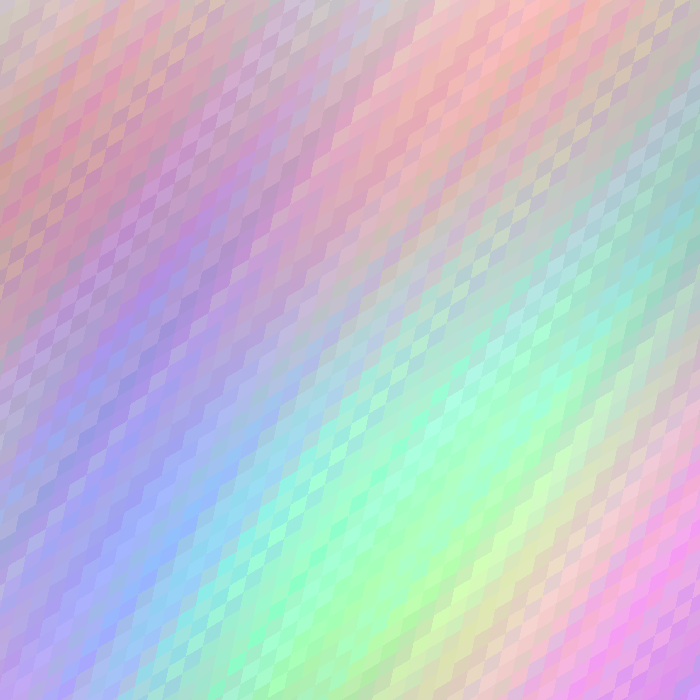

In [13]:
super_phase_grid()

Cool! Also, if you scroll it looks like the lines are moving.